# Predicting House Prices with Regression using TensorFlow
- หัดทำการ Normalization


เอกสารประกอบ <br>
https://www.kaggle.com/harlfoxem/housesalesprediction

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('../datasources/kc_house_data.csv')
df.sample(5)

id       date     price  bedrooms  bathrooms  sqft_living  \
10162  5452800800  6/13/2014  890000.0         4       2.25         2770   
14455  1254200835  8/13/2014  595000.0         4       1.75         2000   
2505   3629910370  4/10/2015  650000.0         3       2.50         2190   
17110  5581400080  6/18/2014  770000.0         4       2.50         3210   
140    4232901525  6/27/2014  665000.0         2       1.00         1110   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
10162     13500     2.0           0     0  ...      8        2770   
14455      5100     1.0           0     0  ...      7        1130   
2505       3600     2.0           0     0  ...      9        2190   
17110     14910     2.0           0     0  ...     10        3210   
140        3200     1.0           0     0  ...      7        1110   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
10162              0      1974             0    98040  47.5430 -122.231   
14455            870      1949             0    98117  47.6798 -122.391   
2505               0      2003             0    98029  47.5506 -121.993   
17110              0      1995             0    98074  47.6073 -122.062   
140                0      1925             0    98119  47.6338 -122.358   

       sqft_living15  sqft_lot15  
10162           2300       13500  
14455           1540        5100  
2505            2300        3600  
17110           3280       14910  
140             1170        3600  

[5 rows x 21 columns]

# ทำการเลือกคอลัมน์ที่จะทิ้งและ Normalization

In [58]:
yreal = df['price'].copy()

df = df.drop('id',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)

In [59]:
MEAN = df.mean()
STD = df.std()
df_norm = (df - MEAN)/STD
df_norm.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -0.866696 -0.402894  -1.451039    -0.980629 -0.228177 -0.915531   -0.087203   
1 -0.006251 -0.402894   0.174482     0.533357 -0.189735  0.937409   -0.087203   
2 -0.980751 -1.482459  -1.451039    -1.427201 -0.123137 -0.915531   -0.087203   
3  0.173405  0.676671   1.149794    -0.131054 -0.243873 -0.915531   -0.087203   
4 -0.082469 -0.402894  -0.150622    -0.436030 -0.169499 -0.915531   -0.087203   

       view  condition     grade  sqft_above  sqft_basement  yr_built  \
0 -0.305708  -0.629972 -0.560787   -0.735234      -0.659016 -0.544665   
1 -0.305708  -0.629972 -0.560787    0.460766       0.244596 -0.680835   
2 -0.305708  -0.629972 -1.413157   -1.230546      -0.659016 -1.293596   
3 -0.305708   2.444371 -0.560787   -0.892284       1.396702 -0.204243   
4 -0.305708  -0.629972  0.291583   -0.131194      -0.659016  0.544688   

   yr_renovated       lat      long  sqft_living15  sqft_lot15  
0     -0.210205 -0.352886 -0.305688      -0.943654   -0.260621  
1      4.744732  1.161349 -0.746268      -0.432877   -0.187695  
2     -0.210205  1.283325 -0.135141       1.070267   -0.172186  
3     -0.210205 -0.283598 -1.272122      -0.914467   -0.284453  
4     -0.210205  0.409284  1.200812      -0.272347   -0.192682

In [60]:
X = df_norm.drop('price',axis=1)

In [65]:
y = df_norm['price']

In [66]:
X.sample(5)

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
2327   0.676671  -0.475727     0.380869 -0.045600  0.010939   -0.087203   
4526   0.676671  -0.150622    -0.784574  1.097457 -0.915531   -0.087203   
20193 -1.482459  -0.475727    -0.980629 -0.342780  0.937409   -0.087203   
20144 -1.482459  -0.800831    -1.361849 -0.319743  0.937409   -0.087203   
3219  -0.402894  -0.475727    -0.403354 -0.100197 -0.915531   -0.087203   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
2327  -0.305708   0.907199 -0.560787    0.774866      -0.659016 -2.110610   
4526  -0.305708  -0.629972 -1.413157   -1.001011       0.244596 -0.374454   
20193 -0.305708  -0.629972  1.996322   -1.218466       0.244596  1.463829   
20144 -0.305708  -0.629972 -0.560787   -1.158062      -0.659016  1.157449   
3219  -0.305708  -0.629972 -0.560787   -0.880203       0.809354 -0.136158   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  
2327       4.712380 -0.256893  2.046442      -0.958247   -0.082799  
4526      -0.210205 -2.080760 -0.362537      -0.082630    0.588159  
20193     -0.210205  0.573843 -0.817330      -0.885279   -0.335416  
20144     -0.210205  0.163888 -0.710738      -0.739343   -0.356681  
3219      -0.210205 -0.666126  3.332652      -1.177152   -0.066300

In [67]:
y.sample(5)

17323   -0.172842
14108    0.380282
17908   -1.157685
2763    -0.327455
14784    1.245899
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test,_,yrealtest = train_test_split(X,y,yreal,test_size=0.3,random_state=101)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [71]:
X_train.shape

(15117, 17)

In [72]:
X_train.sample(5)

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
17699 -0.402894   0.174482     0.446221 -0.152113  0.937409   -0.087203   
20381  1.756237   0.824690     0.642277 -0.249185  0.937409   -0.087203   
3595   0.676671  -0.150622    -0.272650 -0.132554 -0.915531   -0.087203   
14986 -1.482459  -1.451039    -1.492553 -0.212481 -0.915531   -0.087203   
19557 -0.402894   0.499586    -0.022135 -0.168461  0.937409   -0.087203   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
17699 -0.305708   0.907199  0.291583    0.847351      -0.659016  0.136180   
20381 -0.305708  -0.629972  0.291583    1.064806      -0.659016  1.429787   
3595  -0.305708  -0.629972 -0.560787    0.050018      -0.659016 -0.272327   
14986 -0.305708  -0.629972 -1.413157   -1.303031      -0.659016 -0.987215   
19557 -0.305708  -0.629972  0.291583   -0.940607       1.712966  0.204265   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  
17699     -0.210205  0.046964  0.582578       1.026486   -0.101131  
20381     -0.210205 -0.530437  0.419137       0.836769   -0.270520  
3595      -0.210205  0.973694  0.269909      -0.024255   -0.073486  
14986     -0.210205 -0.321851 -1.137106      -1.819272   -0.236789  
19557     -0.210205  0.751394  0.596791      -0.330721   -0.241555

In [73]:
len(X_train),len(X_test),

(15117, 6480)

In [88]:
model = Sequential()

model.add(Dense(32,input_shape=(17,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [89]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=1000,epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 13ms/step - loss: 0.5223 - val_loss: 0.3888
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3631 - val_loss: 0.3115
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3126 - val_loss: 0.2915
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2947 - val_loss: 0.2787
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2826 - val_loss: 0.2709
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.2740 - val_loss: 0.2646
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2661 - val_loss: 0.2579
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2594 - val_loss: 0.2518
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2522 - val_loss: 0.2450
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2465 - val_loss: 0.2420
Epoch 11

16/16 [==============================] - 0s 7ms/step - loss: 0.1681 - val_loss: 0.1959
Epoch 84/200
16/16 [==============================] - 0s 10ms/step - loss: 0.1668 - val_loss: 0.1938
Epoch 85/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1664 - val_loss: 0.1976
Epoch 86/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1698 - val_loss: 0.1965
Epoch 87/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1679 - val_loss: 0.1941
Epoch 88/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1668 - val_loss: 0.1948
Epoch 89/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1681 - val_loss: 0.1926
Epoch 90/200
16/16 [==============================] - 0s 7ms/step - loss: 0.1643 - val_loss: 0.1930
Epoch 91/200
16/16 [==============================] - 0s 7ms/step - loss: 0.1672 - val_loss: 0.1943
Epoch 92/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1654 - val_loss: 0.1953
Epoch 93/200

16/16 [==============================] - 0s 6ms/step - loss: 0.1541 - val_loss: 0.1950
Epoch 164/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1500 - val_loss: 0.1933
Epoch 165/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1488 - val_loss: 0.1942
Epoch 166/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1498 - val_loss: 0.1937
Epoch 167/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1484 - val_loss: 0.1946
Epoch 168/200
16/16 [==============================] - 0s 7ms/step - loss: 0.1482 - val_loss: 0.1940
Epoch 169/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1470 - val_loss: 0.1940
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1470 - val_loss: 0.1959
Epoch 171/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1481 - val_loss: 0.1956
Epoch 172/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1523 - val_loss: 0.1977
Epoc

<AxesSubplot:>

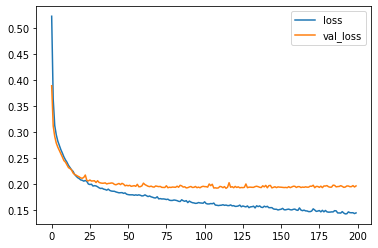

In [90]:
losses = pd.DataFrame(model.history.history)
losses.plot()

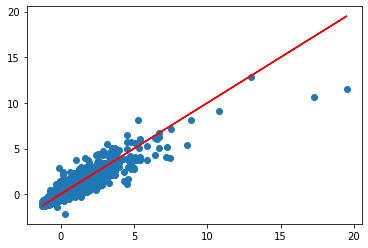

In [91]:
predictions = model.predict(X_test)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [92]:
y_test.shape,predictions.shape

((6480,), (6480, 1))

# ทดสอบการทำนาย

In [93]:
STD['price'],MEAN['price']

(367368.1401013936, 540296.5735055795)

In [94]:
predictions

array([[-0.3288532 ],
       [ 0.3748922 ],
       [ 0.07390167],
       ...,
       [-0.34994516],
       [-0.58916706],
       [ 2.290627  ]], dtype=float32)

In [96]:
#ลองทำ Normalization กลับมา
XX = (predictions.reshape(1,-1)[0]*STD['price'])+MEAN['price']

In [97]:
XX

array([ 419486.38,  678020.  ,  567445.7 , ...,  411737.88,  323855.38,
       1381800.  ], dtype=float32)

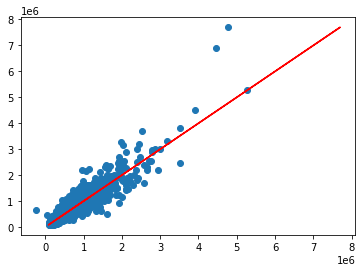

In [98]:
plt.scatter(XX,yrealtest)
# Perfect predictions
plt.plot(yrealtest,yrealtest,'r')

In [99]:
yrealtest

15832     319000.0
6001      464625.0
4256      489950.0
15849     395000.0
4088      458000.0
           ...    
16591     585000.0
17052     132825.0
10587     422500.0
11204     435000.0
1679     1230000.0
Name: price, Length: 6480, dtype: float64

In [100]:
df.tail(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
21592      2009             0  47.6993 -122.346           1530        1509  
21593      2014             0  47.5107 -122.362           1830        7200  
21594      2009             0  47.5944 -122.299           1020        2007  
21595      2004             0  47.5345 -122.069           1410        1287  
21596      2008             0  47.5941 -122.299           1020        1357

In [101]:
y_test.values.reshape(6480, 1)

array([[-0.60238368],
       [-0.20598295],
       [-0.13704665],
       ...,
       [-0.32064994],
       [-0.28662413],
       [ 1.87741764]])

In [102]:
errors = y_test.values.reshape(6480, 1) - predictions

<AxesSubplot:>

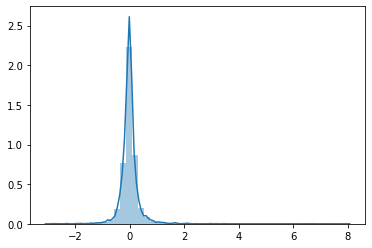

In [103]:
sns.distplot(errors)

<AxesSubplot:xlabel='price'>

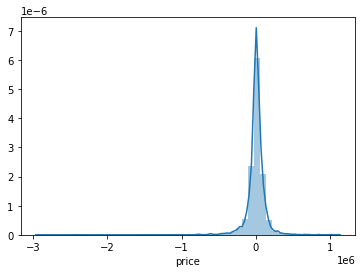

In [105]:
errors = np.array(XX) - yrealtest
sns.distplot(errors)